In [471]:
import pandas as pd
import pandas as pd
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from datetime import datetime

Matplotlib is building the font cache; this may take a moment.


In [423]:
#aot means AQI of Tehran
#In the following code, I have made average of AQI in each month of a year

df = pd.read_csv(r"C:\Users\Lenovo\Desktop\Python Projects\Weather forecasting of Tehran\AQI-Tehran-2012-2022.csv")
print(df)
df1=df.groupby(pd.PeriodIndex(df['Date'], freq="M"))['AQI'].mean().reset_index()
print(df1)

           Date  AQI
0      1-Jan-12  107
1      2-Jan-12  112
2      3-Jan-12  132
3      4-Jan-12   90
4      5-Jan-12  102
...         ...  ...
4013  27-Dec-22  120
4014  28-Dec-22  115
4015  29-Dec-22  121
4016  30-Dec-22  154
4017  31-Dec-22  159

[4018 rows x 2 columns]
        Date         AQI
0    2012-01  107.387097
1    2012-02   99.172414
2    2012-03   87.806452
3    2012-04   93.666667
4    2012-05  117.387097
..       ...         ...
127  2022-08  111.516129
128  2022-09   95.333333
129  2022-10   90.838710
130  2022-11  110.200000
131  2022-12  123.161290

[132 rows x 2 columns]


In [424]:
#because there is an error to plot a dataframe with a column of periodic data, the data frame was saved in another CSV file called Biodata
df1.to_csv('MonthlyAQI.csv', index=False)
df1 = pd.read_csv(r"MonthlyAQI.csv")

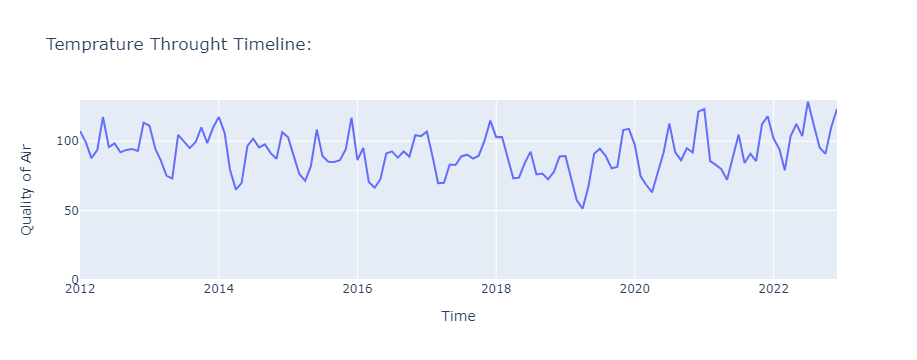

In [425]:

fig = go.Figure(layout = go.Layout(yaxis=dict(range=[0, df1['AQI'].max()+1])))
fig.add_trace(go.Scatter(x=df1['Date'], y=df1['AQI']), )
fig.update_layout(title='Temprature Throught Timeline:',
                 xaxis_title='Time', yaxis_title='Quality of Air')

fig.show()

In [426]:
#transforming the sring of Date to datetime in order to sort them by month in the following
df2=pd.DataFrame(pd.to_datetime(df1['Date']).rename('Datetime'))

#adding column of datetime to df
df1.loc[:, ["Datetime"]] = [df2]
print(df1)

df3=df1

        Date         AQI   Datetime
0    2012-01  107.387097 2012-01-01
1    2012-02   99.172414 2012-02-01
2    2012-03   87.806452 2012-03-01
3    2012-04   93.666667 2012-04-01
4    2012-05  117.387097 2012-05-01
..       ...         ...        ...
127  2022-08  111.516129 2022-08-01
128  2022-09   95.333333 2022-09-01
129  2022-10   90.838710 2022-10-01
130  2022-11  110.200000 2022-11-01
131  2022-12  123.161290 2022-12-01

[132 rows x 3 columns]


In [427]:
#spliting datetime column in to year and month, in order to sort the columns by month
df3['Year'] = df3['Datetime'].dt.year 
df3['Month'] = df3['Datetime'].dt.month_name()


df4=df3 # having df3 for the future use without sorting
print(df4)

#now sorting the columns by Month
df3['INT'] = df3['Datetime'].dt.month
df3 = df3.sort_values(["INT"])
print(df3)


        Date         AQI   Datetime  Year      Month
0    2012-01  107.387097 2012-01-01  2012    January
1    2012-02   99.172414 2012-02-01  2012   February
2    2012-03   87.806452 2012-03-01  2012      March
3    2012-04   93.666667 2012-04-01  2012      April
4    2012-05  117.387097 2012-05-01  2012        May
..       ...         ...        ...   ...        ...
127  2022-08  111.516129 2022-08-01  2022     August
128  2022-09   95.333333 2022-09-01  2022  September
129  2022-10   90.838710 2022-10-01  2022    October
130  2022-11  110.200000 2022-11-01  2022   November
131  2022-12  123.161290 2022-12-01  2022   December

[132 rows x 5 columns]
        Date         AQI   Datetime  Year     Month  INT
0    2012-01  107.387097 2012-01-01  2012   January    1
72   2018-01  102.935484 2018-01-01  2018   January    1
48   2016-01   86.354839 2016-01-01  2016   January    1
84   2019-01   89.258065 2019-01-01  2019   January    1
36   2015-01  102.774194 2015-01-01  2015   January    

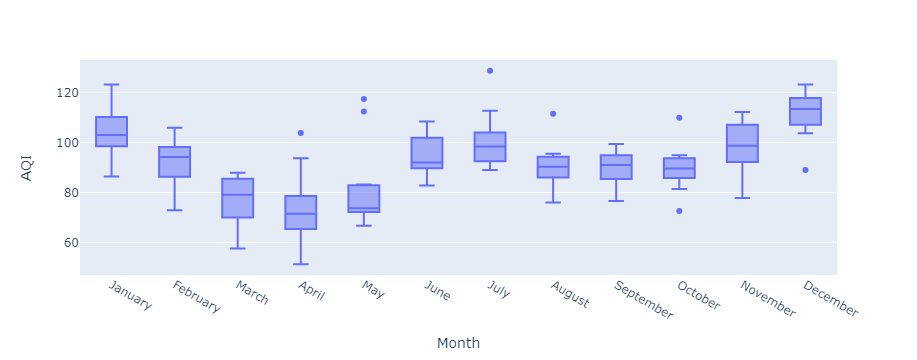

In [428]:
#plotting range of monthly average AQI
fig = px.box(df3, 'Month', 'AQI')
fig.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Use

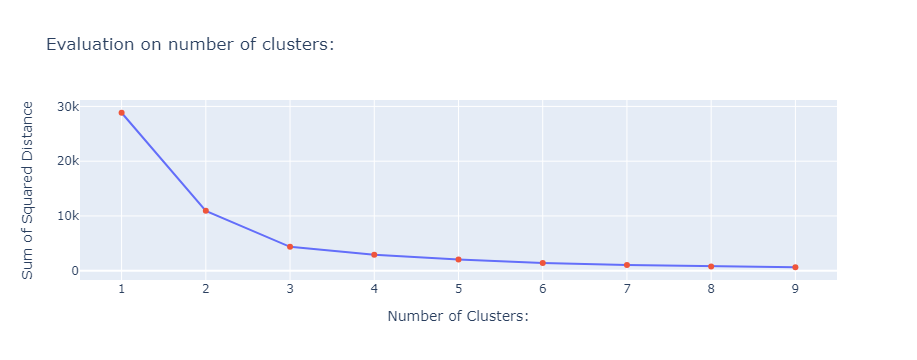

In [429]:
from sklearn.cluster import KMeans
sse = []
target = df3['AQI'].to_numpy().reshape(-1,1)
num_clusters = list(range(1, 10))

for k in num_clusters:
    km = KMeans(n_clusters=k)
    km.fit(target)
    sse.append(km.inertia_)

fig = go.Figure(data=[
    go.Scatter(x = num_clusters, y=sse, mode='lines'),
    go.Scatter(x = num_clusters, y=sse, mode='markers')
])

fig.update_layout(title="Evaluation on number of clusters:",
                 xaxis_title = "Number of Clusters:",
                 yaxis_title = "Sum of Squared Distance",
                 showlegend=False)
fig.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



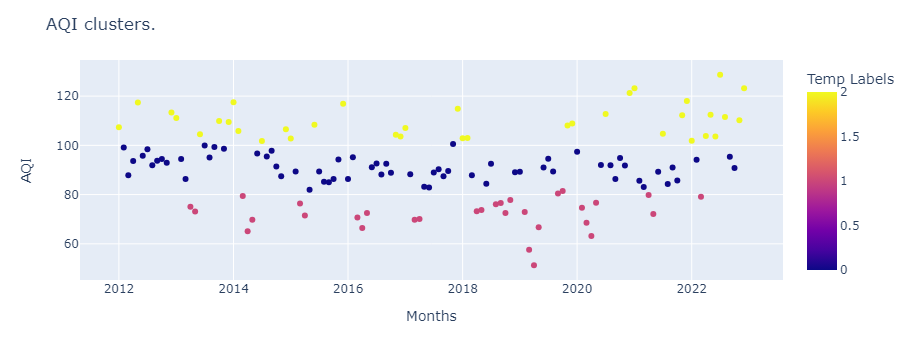

In [431]:
km = KMeans(3)
km.fit(df3['AQI'].to_numpy().reshape(-1,1))
df3.loc[:,'Temp Labels'] = km.labels_
fig = px.scatter(df3, 'Datetime', 'AQI', color='Temp Labels')
fig.update_layout(title = "AQI clusters.",
                 xaxis_title="Months", yaxis_title="AQI")
fig.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



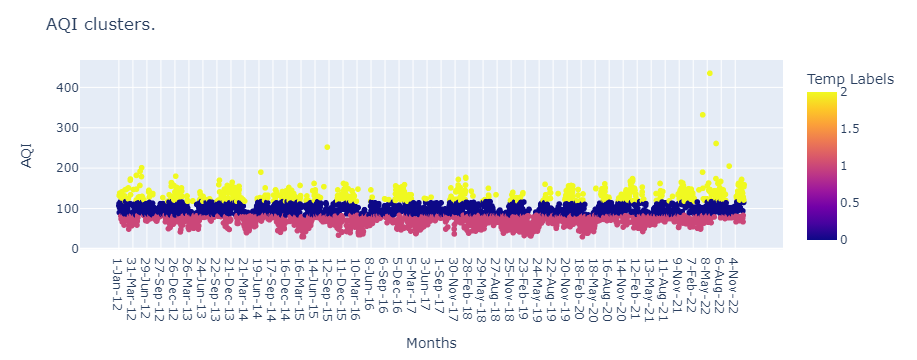

In [432]:
km = KMeans(3)
km.fit(df['AQI'].to_numpy().reshape(-1,1))
df.loc[:,'Temp Labels'] = km.labels_
fig = px.scatter(df, 'Date', 'AQI', color='Temp Labels')
fig.update_layout(title = "AQI clusters.",
                 xaxis_title="Months", yaxis_title="AQI")
fig.show()

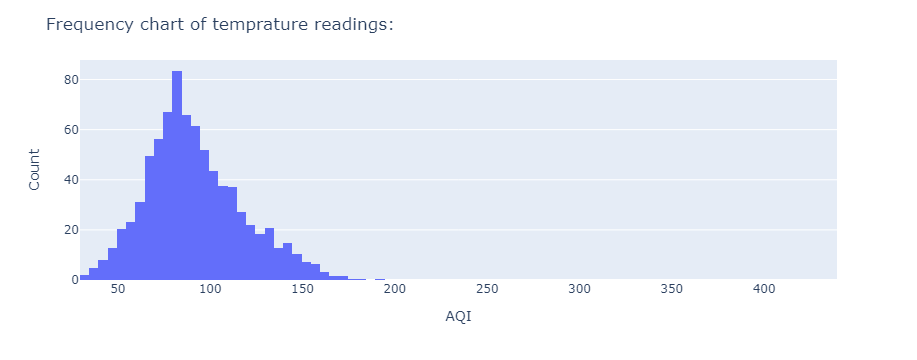

In [433]:
#histogram of AQI of days
fig = px.histogram(x=df['AQI'], nbins=200, histnorm='density')
fig.update_layout(title='Frequency chart of temprature readings:',
                 xaxis_title='AQI', yaxis_title='Count')

    Date         AQI
0   2012   98.885246
1   2013   96.449315
2   2014   92.854795
3   2015   90.643836
4   2016   87.661202
5   2017   89.457534
6   2018   84.054795
7   2019   82.704110
8   2020   89.445355
9   2021   94.172603
10  2022  104.654795


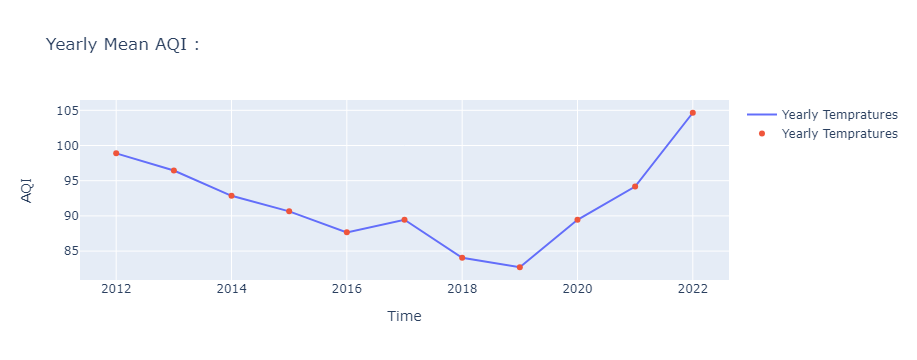

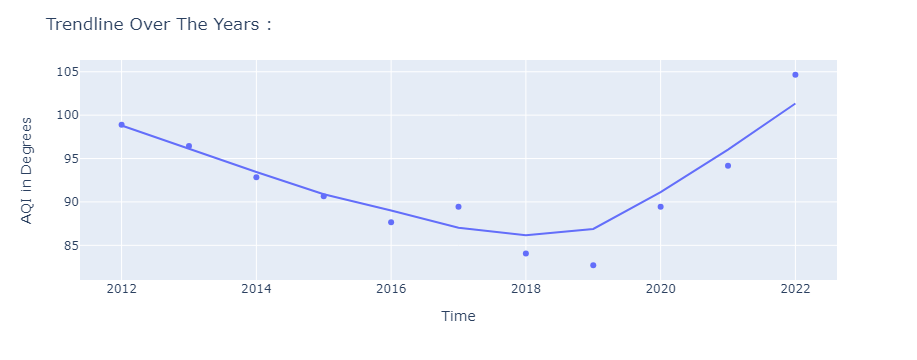

In [434]:
#plotting average mean of year to see how trend of increasing AQI
df2=df.groupby(pd.PeriodIndex(df['Date'], freq="Y"))['AQI'].mean().reset_index()
print(df2)

#because there is an error to plot a dataframe with a column of periodic data, the data frame was saved in another CSV file called Biodata
df2.to_csv('YearlyAQI.csv', index=False)
df2 = pd.read_csv(r"YearlyAQI.csv")

fig = go.Figure(data=[
    go.Scatter(name='Yearly Tempratures' , x=df2['Date'], y=df2['AQI'], mode='lines'),
    go.Scatter(name='Yearly Tempratures' , x=df2['Date'], y=df2['AQI'], mode='markers')
])
fig.update_layout(title='Yearly Mean AQI :',
                 xaxis_title='Time', yaxis_title='AQI')
fig.show()

fig = px.scatter(df2,x = 'Date', y = 'AQI', trendline = 'lowess')
fig.update_layout(title='Trendline Over The Years :',
                 xaxis_title='Time', yaxis_title='AQI in Degrees')
fig.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14324\1394592457.py:12: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



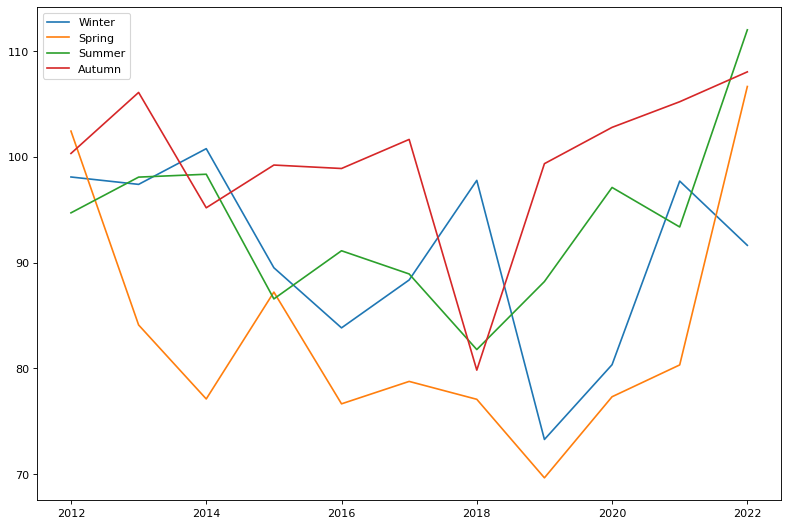

In [482]:
#Seasonal Analysis

#plotting average mean of quarters to see how trend of increasing AQI
df5=df.groupby(pd.PeriodIndex(df['Date'], freq="Q"))['AQI'].mean().reset_index()


#because there is an error to plot a dataframe with a column of periodic data, the data frame was saved in another CSV file called Biodata
df5.to_csv('QuarterlyAQI.csv', index=False)
df5 = pd.read_csv(r"QuarterlyAQI.csv")

#transforming the sring of Date to datetime in order to sort them by month in the following
df6=pd.DataFrame(pd.to_datetime(df5['Date']).rename('Datetime'))

#adding column of datetime to df
df5.loc[:, ["Datetime"]] = [df6]


#spliting datetime column in to year and month, in order to sort the columns by month
df5['Year'] = df5['Datetime'].dt.year 
df5['Quarter'] = df5['Datetime'].dt.quarter



plt.figure(figsize=(12, 8), dpi=80)

plt.plot('Year', 'AQI', data = df5[df5['Quarter']==1], label = "Winter".format(1))
plt.plot('Year', 'AQI', data = df5[df5['Quarter']==2], label = "Spring".format(2))
plt.plot('Year', 'AQI', data = df5[df5['Quarter']==3], label = "Summer".format(3))
plt.plot('Year', 'AQI', data = df5[df5['Quarter']==4], label = "Autumn".format(4))
    
plt.legend()


#df3 = df3.sort_values(["INT"])
#print(df3)

#now sorting the columns by Month
#df3['INT'] = df5['Datetime'].dt.month
#df5 = df5.sort_values(["INT"])
#print(df3)

#df5=df5.sort_values(by=['Date'])
#print(df5)

